# Laboratorium 9
Sebastian Soczawa, Piotr Kuchta|

In [54]:
from scipy.integrate import odeint
from scipy.optimize import fsolve
import numpy as np
import matplotlib.pyplot as plt

# Zadanie 1
 Przedstaw każde z poniższych równań różniczkowych zwyczajnych
jako równoważny układ równań pierwszego rzędu (ang. first-order system of
ODEs):

## a) równanie Van der Pol’a:
$$ y`` = y`(1 − y^2 ) − y$$ 

Układ równań pierwszego rzędu: 

$$\begin{equation}
\begin{cases}
y_1 = y`, \\
y_1` = y_1(1 - y^2) - y.
\end{cases}
\end{equation}
$$

## b) równanie Blasiusa:

$$ y``` = -yy`` $$

Układ równań pierwszego rzędu:

$$\begin{equation}
y_1 = y, \\
y_2 = y_1`, \\
y_3 = y_2`
\end{equation}
$$

$$\begin{equation}
\begin{cases}
y_3` = -y_1 y_2`, \\
y_2 = y_1`, \\
y_1 = y
\end{cases}
\end{equation}
$$

## c) II zasada dynamiki Newtona dla problemu dwóch ciał:

$$ \begin{align*}
y_1`` = −GM y_1 /(y_1^2 + y_2^2)^{3/2}, \\
y_2`` = −GM y_2 /(y_1^2 + y_2^2)^{3/2}.
\end{align*}
$$
Układ równań pierwszego rzędu:

$$\begin{equation}
\begin{cases}
y_3 = y_1`, \\
y_3` = -GM y_1 /(y_1^2 + y_2^2)^{3/2}, \\
y_4 = y_2`, \\
y_4` = -GM y_2 /(y_1^2 + y_2^2)^{3/2},
\end{cases}
\end{equation}
$$

# Zadanie 2


Aby metoda jawna eulera była stabilna dla 
$$\begin{equation}
h = 0.5 
\end{equation}
$$
$$\begin{equation}
k = -5
\end{equation}
$$
Musi zachodzić zależność
$$\begin{equation}
|1+hk|<1
\end{equation}
$$




Warunek nie jest spełniony więc możemy spodziewać się że wynik przybliżony będzie znacząco różnił się od wartości rzeczywistej

In [55]:
def fval(y,t):
    return -5*y

def real_fval(x):
    return np.e**(-5*x)

     
def euler_exp(y0, x0, t, h, end, f):
    iters = int((end - x0)//h)+1
    sol = np.empty(shape=iters)
    xs = np.empty(shape=iters)
    y = y0
    sol[0] = y
    xs[0] = x0
    for i in range(1,iters):
        y = y + h * f(y, t)
        x0 = x0 + h
        sol[i] = y
        xs[i] = x0
    return sol, xs
#c
rval = real_fval(0.5) 
y,x = euler_exp(1,0,0,0.5,0.5,fval)
calc_val = np.interp(0.5,x,y)
err = abs((rval-calc_val)/rval)
print(err)
print(rval)
print(calc_val)

19.27374094105521
0.0820849986238988
-1.5



Dla
$$\begin{equation}
h = 0.5 
\end{equation}
$$
$$\begin{equation}
k = -5
\end{equation}
$$
Spełniony jestwarunek
$$
\begin{equation}
|\frac{1}{1+hk}|<1
\end{equation}
$$
Wynika z tego że metoda niejawna eulera powinna być stabilna


In [56]:
def euler_imp_fval(y0, x0, h, end):
    iters = int((end - x0)//h)+1
    sol = np.empty(shape=iters)
    xs = np.empty(shape=iters)
    y = y0
    sol[0] = y
    xs[0] = x0
    for i in range(1,iters):
        y = y/(1+5*h)
        x0 = x0 + h
        sol[i] = y
        xs[i] = x0
    return sol, xs

# d
y,x = euler_imp_fval(1,0,0.5,0.5)
calc_val = np.interp(0.5,x,y)
err = abs((rval-calc_val)/rval)
print(err)
print(rval)
print(calc_val)

2.4807125602009923
0.0820849986238988
0.2857142857142857


## Wnioski
Dla danego h metoda jawna Eulera jest niestabilna, a metoda niejawna Eulera jest stabilna.

# Zadanie 3

## Metoda jawna eulera

In [57]:
# x1,x2,y1,y2 are previous values.
def ode_vals(x1,x2,y1,y2):
    mat = np.empty(shape=4)
    tmp = (x1**2+y1**2)**(3/2)
    mat[0] = x2
    mat[1] = -x1/tmp
    mat[2] = y2
    mat[3] = -y1/tmp
    return mat

def euler_exp_mat(x1, x2, y1, y2, h, t, end, endx=True):
    if endx:
        iters = int((end - x1)//h)+1
    else:
        iters = int((end - y1)//h)+1
    t = 0
    sol = np.empty(shape=iters,dtype='object')
    sol[0] = (x1,x2,y1,y2,t)
    for i in range(1,iters):
        nval = ode_vals(x1,x2,y1,y2)
        x1 = x1 + h * nval[0]
        x2 = x2 + h * nval[1]
        y1 = y1 + h * nval[2]
        y2 = y2 + h * nval[3]
        t = t + h
        sol[i] = (x1,x2,y1,y2,t)
    return sol

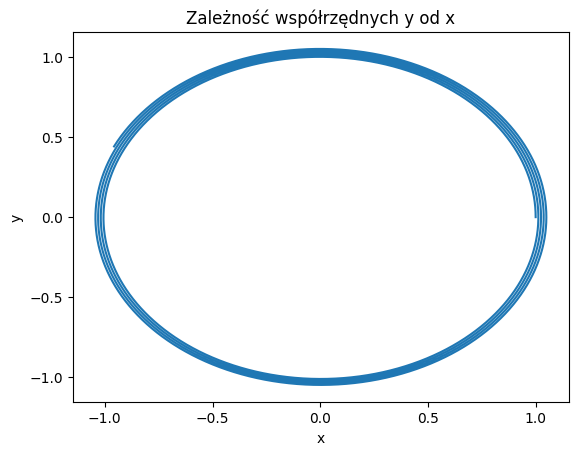

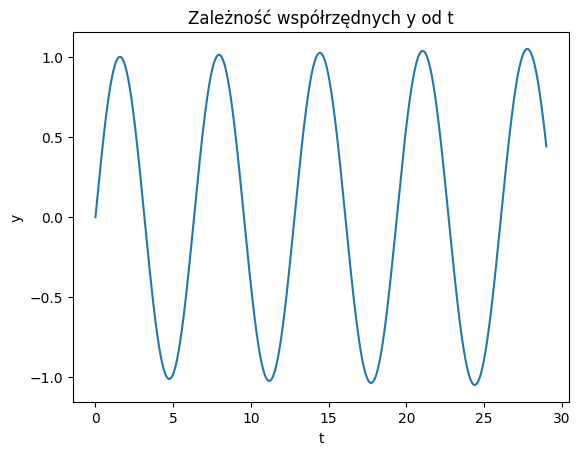

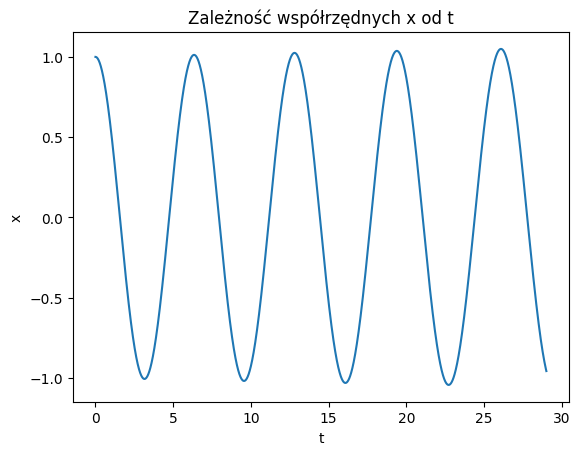

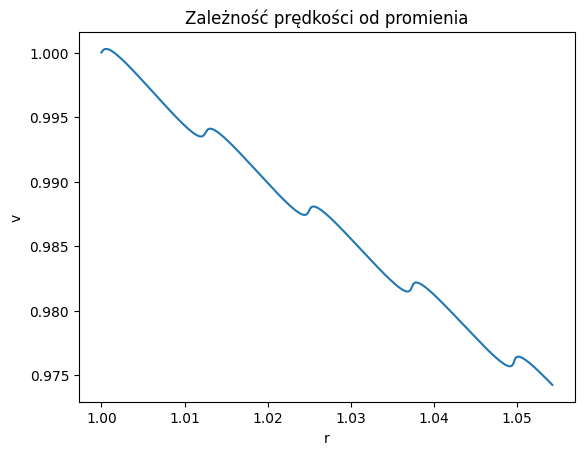

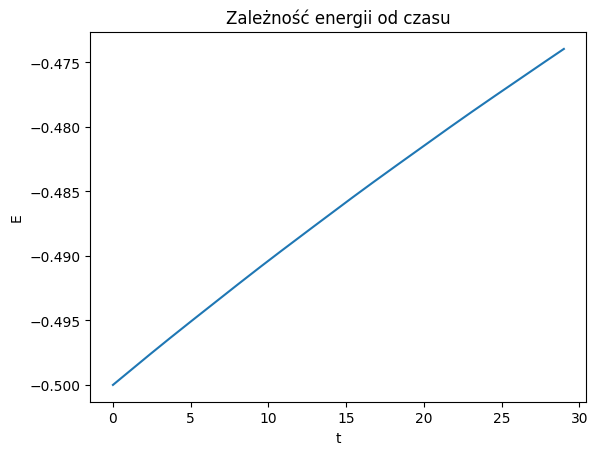

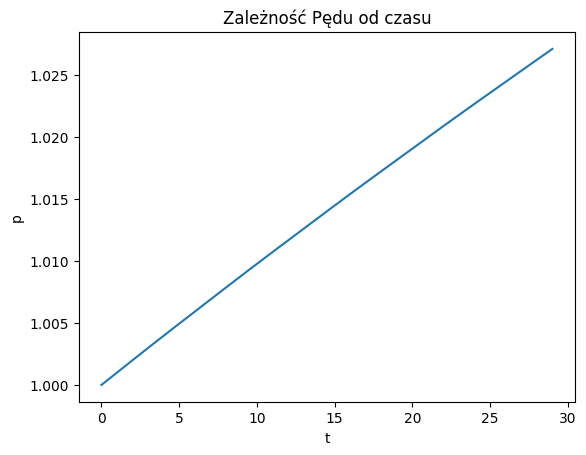

In [58]:

sol = euler_exp_mat(1,0,0,1,0.001,0,30)
x,y,x_der,y_der,t,v,r = [i[0] for i in sol],[i[2] for i in sol],[i[1] for i in sol],[i[3] for i in sol],[i[4] for i in sol],[(i[1]**2+i[3]**2)**(1/2) for i in sol],[(i[0]**2+i[2]**2)**(1/2) for i in sol]

plt.plot(x,y)
plt.title("Zależność współrzędnych y od x")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

plt.plot(t,y)
plt.title("Zależność współrzędnych y od t")
plt.xlabel("t")
plt.ylabel("y")
plt.show()

plt.plot(t,x)
plt.title("Zależność współrzędnych x od t")
plt.xlabel("t")
plt.ylabel("x")
plt.show()

plt.plot(r,v)
plt.title("Zależność prędkości od promienia")
plt.xlabel("r")
plt.ylabel("v")
plt.show()
# Energy
eval = [(x_der[i]**2+y_der[i]**2)/2-1/r[i] for i in range(len(r))]
plt.plot(t,eval)
plt.title("Zależność energii od czasu")
plt.xlabel("t")
plt.ylabel("E")
plt.show()
# Momentum
pval = [x[i]*y_der[i]-y[i]*x_der[i] for i in range(len(x))]
plt.plot(t,pval)
plt.title("Zależność Pędu od czasu")
plt.xlabel("t")
plt.ylabel("p")
plt.show()

## Metoda niejawna Eulera

In [59]:
def solve_imp(vars,px1,px2,py1,py2,h):
    x1,x2,y1,y2 = vars
    eq1 = x1 - px1 - h * x2 #x1
    eq2 = x2 - px2 + h * x1/((x1**2+y1**2)**(3/2)) #x2
    eq3 = y1 - py1 - h * y2 #y1
    eq4 = y2 - py2 + h * y1/((x1**2+y1**2)**(3/2)) #y2
    return [eq1,eq2,eq3,eq4]

def euler_imp_mat(x1, x2, y1, y2, h, time, end, endx=True):
    if endx:
        iters = int((end - x1)//h)+1
    else:
        iters = int((end - y1)//h)+1
    sol = np.empty(shape=iters,dtype='object')
    sol[0] = (x1,x2,y1,y2)
    for i in range(1,iters):
        tmp = sol[i-1]+(h,)
        sol[i] = fsolve(solve_imp,sol[i-1],args=tmp)
        sol[i] = tuple(sol[i])
        sol[i-1] = sol[i-1]+(time,)
        time += h
    sol[iters-1] = sol[iters-1]+(time,)
    return sol

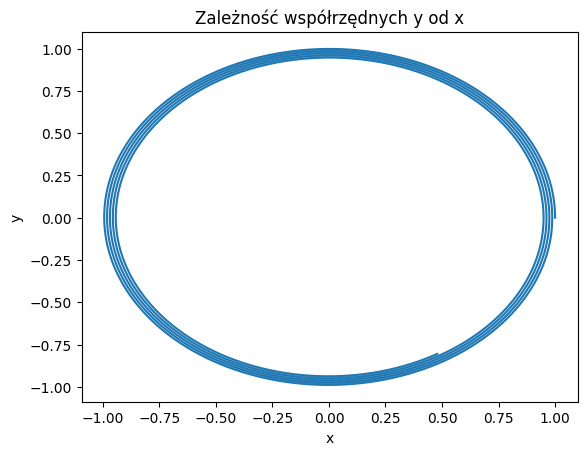

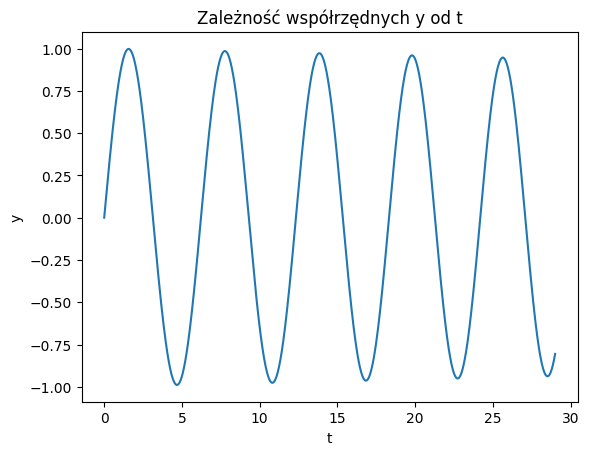

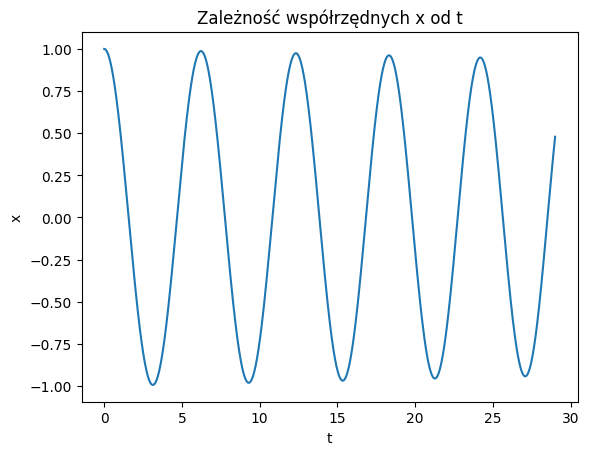

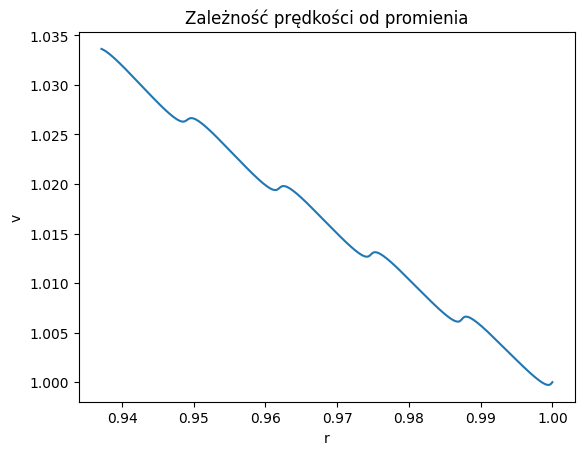

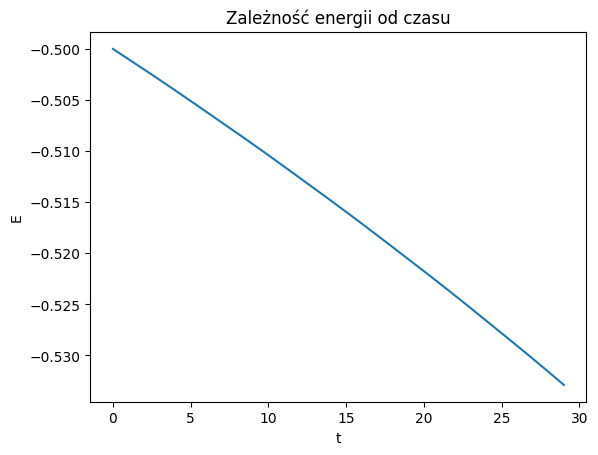

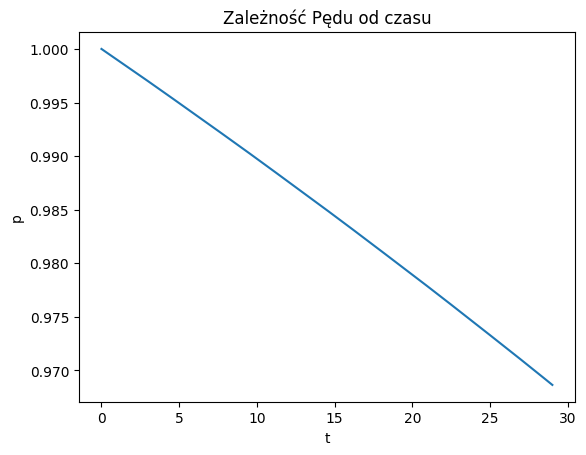

In [60]:
sol = euler_imp_mat(1,0,0,1,0.001,0,30)
x,y,x_der,y_der,t,v,r = [i[0] for i in sol],[i[2] for i in sol],[i[1] for i in sol],[i[3] for i in sol],[i[4] for i in sol],[(i[1]**2+i[3]**2)**(1/2) for i in sol],[(i[0]**2+i[2]**2)**(1/2) for i in sol]
plt.plot(x,y)
plt.title("Zależność współrzędnych y od x")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

plt.plot(t,y)
plt.title("Zależność współrzędnych y od t")
plt.xlabel("t")
plt.ylabel("y")
plt.show()

plt.plot(t,x)
plt.title("Zależność współrzędnych x od t")
plt.xlabel("t")
plt.ylabel("x")
plt.show()

plt.plot(r,v)
plt.title("Zależność prędkości od promienia")
plt.xlabel("r")
plt.ylabel("v")
plt.show()
# Energy
eval = [(x_der[i]**2+y_der[i]**2)/2-1/r[i] for i in range(len(r))]
plt.plot(t,eval)
plt.title("Zależność energii od czasu")
plt.xlabel("t")
plt.ylabel("E")
plt.show()
# Momentum
pval = [x[i]*y_der[i]-y[i]*x_der[i] for i in range(len(x))]
plt.plot(t,pval)
plt.title("Zależność Pędu od czasu")
plt.xlabel("t")
plt.ylabel("p")
plt.show()

## Metoda półjawna Eulera

In [61]:
def euler_semi_mat(x1, x2, y1, y2, h, time, end, endx=True):
    if endx:
        iters = int((end - x1)//h)+1
    else:
        iters = int((end - y1)//h)+1
    sol = np.empty(shape=iters,dtype='object')
    sol[0] = (x1,x2,y1,y2,time)
    for i in range(1,iters):
        x1_next = sol[i-1][0] + h*sol[i-1][1]
        x2_next = sol[i-1][1] + h*(-x1_next)/((x1_next**2+sol[i-1][2]**2)**(3/2))
        y1_next = sol[i-1][2] + h*sol[i-1][3]
        y2_next = sol[i-1][3] + h*(-y1_next)/((y1_next**2+x1_next**2)**(3/2))
        sol[i]=(x1_next,x2_next,y1_next,y2_next,sol[i-1][4]+h)
    return sol

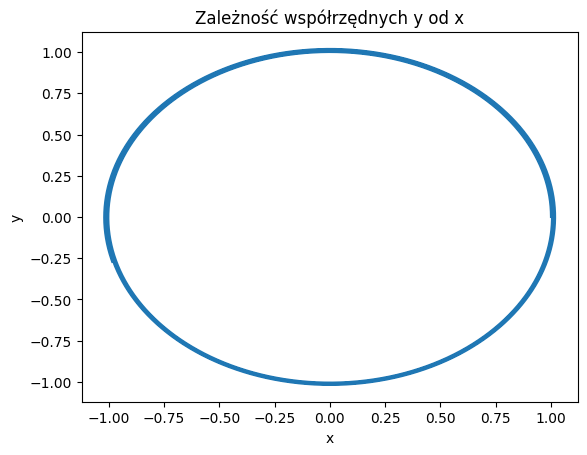

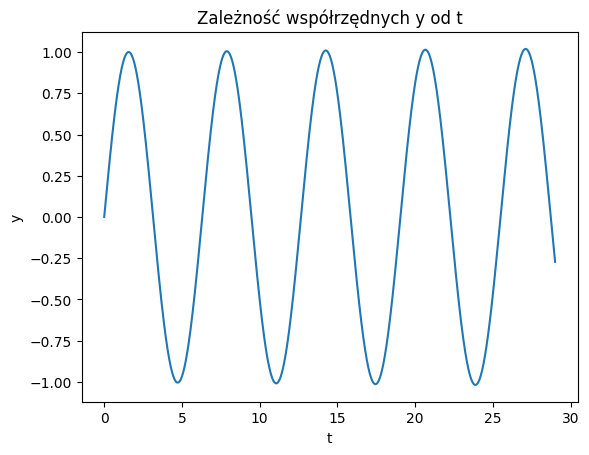

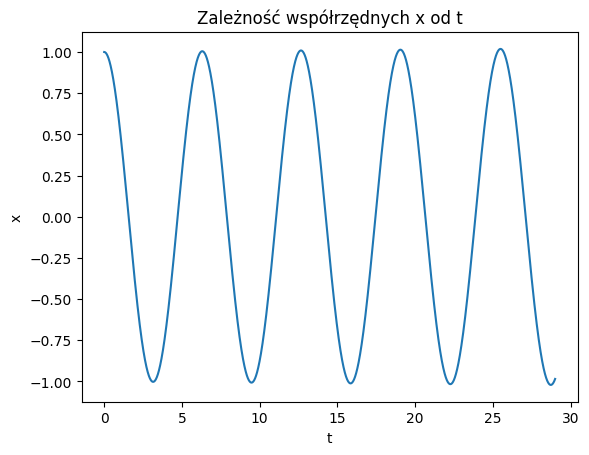

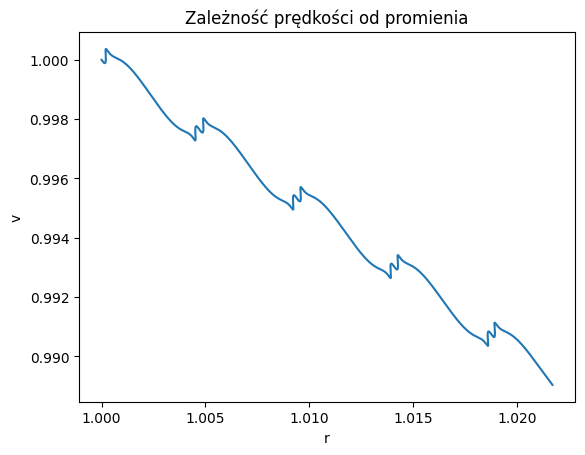

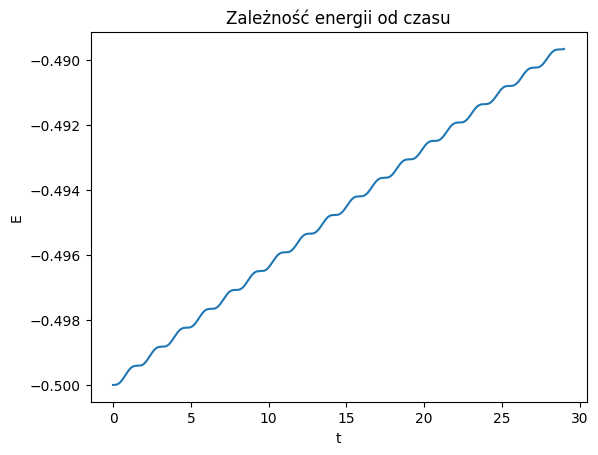

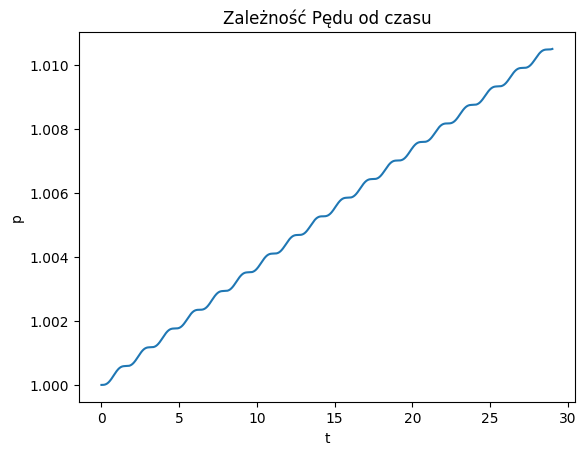

In [62]:
n = 30
h = 0.001
sol = euler_semi_mat(1,0,0,1,h,0,n)
x,y,x_der,y_der,t,v,r = [i[0] for i in sol],[i[2] for i in sol],[i[1] for i in sol],[i[3] for i in sol],[i[4] for i in sol],[(i[1]**2+i[3]**2)**(1/2) for i in sol],[(i[0]**2+i[2]**2)**(1/2) for i in sol]
plt.plot(x,y)
plt.title("Zależność współrzędnych y od x")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

plt.plot(t,y)
plt.title("Zależność współrzędnych y od t")
plt.xlabel("t")
plt.ylabel("y")
plt.show()

plt.plot(t,x)
plt.title("Zależność współrzędnych x od t")
plt.xlabel("t")
plt.ylabel("x")
plt.show()

plt.plot(r,v)
plt.title("Zależność prędkości od promienia")
plt.xlabel("r")
plt.ylabel("v")
plt.show()
# Energy
eval = [(x_der[i]**2+y_der[i]**2)/2-1/r[i] for i in range(len(r))]
plt.plot(t,eval)
plt.title("Zależność energii od czasu")
plt.xlabel("t")
plt.ylabel("E")
plt.show()
# Momentum
pval = [x[i]*y_der[i]-y[i]*x_der[i] for i in range(len(x))]
plt.plot(t,pval)
plt.title("Zależność Pędu od czasu")
plt.xlabel("t")
plt.ylabel("p")
plt.show()

## Metoda Rungego-Kutty

In [63]:
def ode_val_x1_y1(t, y_k, x, y):
    return x
def ode_val_x2(t, y_k, x, y):
    return -x/((x**2 + y**2)**(3/2))

def ode_val_y2(t, y_k, x, y):
    return -y/((x**2 + y**2)**(3/2))

In [64]:
def count_rk_step(f, t_k, y_k, x1_k, y1_k, h):
    k1 = f(t_k, y_k, x1_k, y1_k)
    k2 = f(t_k + h/2, y_k + (h/2)*k1, x1_k, y1_k)
    k3 = f(t_k + h/2, y_k + (h/2)*k2, x1_k, y1_k)
    k4 = f(t_k + h, y_k + h*k3, x1_k, y1_k)
    return y_k + h/6 * (k1 + 2*k2 + 2*k3 + k4)

In [65]:
def rk4(x1, x2, y1, y2, h, end):
    iters = int(end//h) + 1
    t=np.arange(0, end, h)
    sol_x = np.zeros(iters)
    sol_y = np.zeros(iters)
    sol_x_der = np.zeros(iters)
    sol_y_der = np.zeros(iters)
    sol_x[0] = x1
    sol_y[0] = y1
    sol_x_der[0] = x2
    sol_y_der[0] = y2
    for i in range(1, iters):
        (tmp_x1, tmp_x2, tmp_y1, tmp_y2) = (x1, x2, y1, y2)
        x1 = count_rk_step(ode_val_x1_y1, t[i], tmp_x1, tmp_x2, None, h)
        x2 = count_rk_step(ode_val_x2, t[i], tmp_x2, tmp_x1, tmp_y1, h)
        y1 = count_rk_step(ode_val_x1_y1, t[i], tmp_y1, tmp_y2, None, h)
        y2 = count_rk_step(ode_val_y2, t[i], tmp_y2, tmp_x1, tmp_y1, h)
        sol_x[i] = x1
        sol_y[i] = y1
        sol_x_der[i] = x2
        sol_y_der[i] = y2
    return (sol_x, sol_y, sol_x_der, sol_y_der, t, iters)

31416 31416 31416


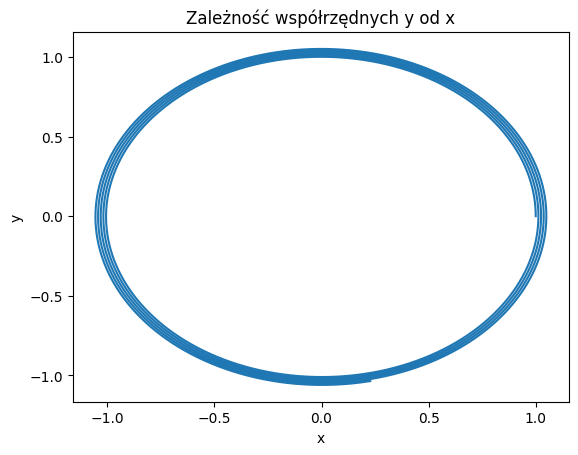

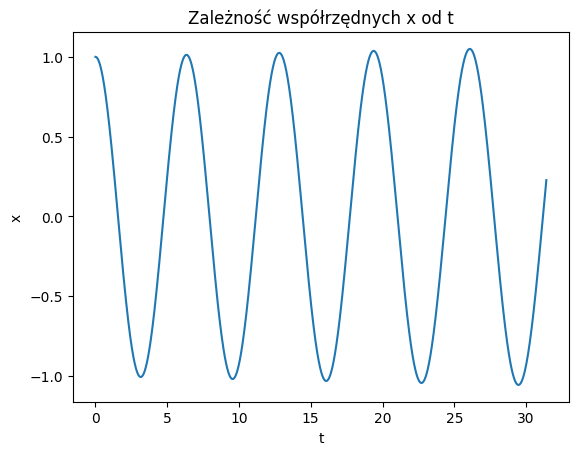

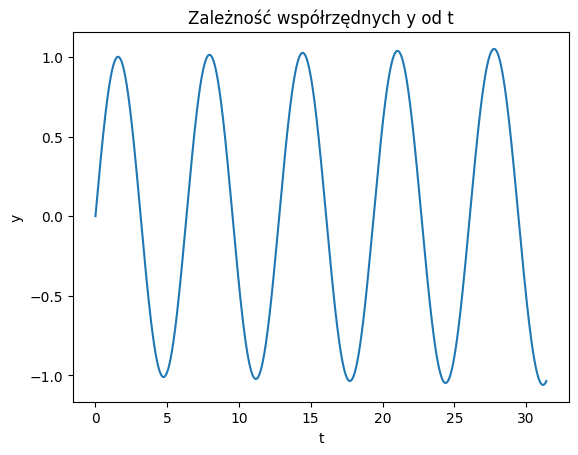

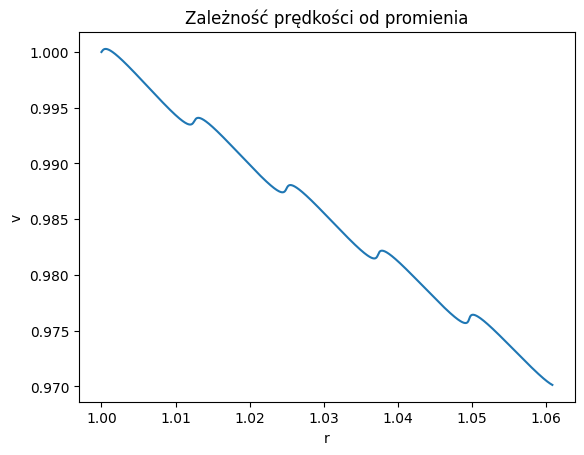

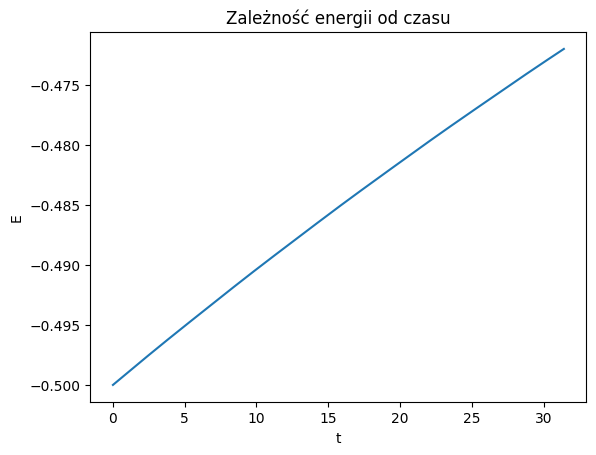

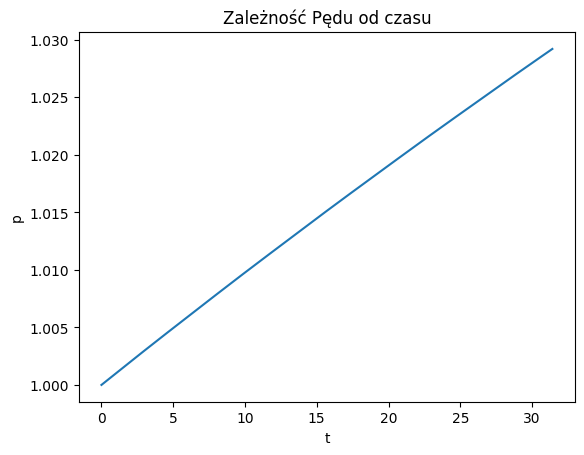

In [66]:
(x, y, x_der, y_der, t, n) = rk4(1, 0, 0, 1, 0.001, 10*np.pi)
print(len(x), len(y), len(t))
plt.plot(x, y)
plt.title("Zależność współrzędnych y od x")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


plt.plot(t, x)
plt.title("Zależność współrzędnych x od t")
plt.xlabel("t")
plt.ylabel("x")
plt.show()


plt.plot(t, y)
plt.title("Zależność współrzędnych y od t")
plt.xlabel("t")
plt.ylabel("y")
plt.show()

x_vals = np.arange(0, n, 1)

# velocity
v_r = [(x_der[i]**2 + y_der[i]**2)**(0.5) for i in range(n)]
r = [(x[i]**2 + y[i]**2)**(0.5) for i in range(n)]
plt.plot(r, v_r)
plt.title("Zależność prędkości od promienia")
plt.xlabel("r")
plt.ylabel("v")

plt.show()

# energy conservation law
ecl = [(x_der[i]**2 + y_der[i]**2)/2 - 1/((x[i]**2 + y[i]**2)**(1/2)) for i in range(n)]

plt.plot(t, ecl)
plt.title("Zależność energii od czasu")
plt.xlabel("t")
plt.ylabel("E")
plt.show()

# momentum conservation law
mcl = [(x[i]*y_der[i] - y[i]*x_der[i]) for i in range(n)]
plt.plot(t, mcl)
plt.title("Zależność Pędu od czasu")
plt.xlabel("t")
plt.ylabel("p")
plt.show()

## Wnioski

Półjawna metoda Eulera okazała się najszybsza, a do tego dała wyniki z najlepszą dokładnością, pozostałe metody działają ze zbliżoną do siebie dokładnością.
Możemy również zauważyć, że w niejawnej metodzie Eulera promień, w przeciwieństwie do reszty metod, zmiejsza się. Możemy skorzystać z tego faktu w przypadku, do wybrania metody, która najbardziej odpowiadałaby rozwiązaniu, którego szukamy.

# Bibliografia
https://en.wikipedia.org/wiki/Backward_Euler_method
https://en.wikipedia.org/wiki/Euler_method
https://en.wikipedia.org/wiki/Semi-implicit_Euler_method
